In [ ]:
import pandas as pd

from google.colab import files

uploaded = files.upload() # creates file upload button that will let me select data set

import os
os.listdir() # lists all files and folders in the current directory.

file_path = "olympics_08_medalists.csv"  # renames the dataset as file_path" so I can refer to it later in the code
df = pd.read_csv(file_path) # reads a CSV file and converts it into a structured table (DataFrame)
# Rows represent observations (e.g., each athlete's record).
#Columns represent variables (e.g., name, country, sport, medal type).

Saving olympics_08_medalists.csv to olympics_08_medalists.csv


# Initial Data Examination

First, in order to clean the dataset I have to examine the data. I have to see what kinds of variables, columns, and missing information I have.

In [ ]:
df.head() # shows first few rows of data set

,medalist_name,male_archery,female_archery,male_athletics,female_athletics,male_badminton,female_badminton,male_baseball,male_basketball,female_basketball,...,female_beach volleyball,male_volleyball,female_volleyball,male_water polo,female_water polo,male_weightlifting,female_weightlifting,male_freestyle wrestling,female_freestyle wrestling,male_greco-roman wrestling
0,Aaron Armstrong,NaN,NaN,gold,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Peirsol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdullo Tangriev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abeer Abdelrahman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bronze,NaN,NaN,NaN
4,Abhinav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info() # Get summary info about columns and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   medalist_name                 1875 non-null   object
 1   male_archery                  11 non-null     object
 2   female_archery                9 non-null      object
 3   male_athletics                85 non-null     object
 4   female_athletics              81 non-null     object
 5   male_badminton                12 non-null     object
 6   female_badminton              10 non-null     object
 7   male_baseball                 72 non-null     object
 8   male_basketball               35 non-null     object
 9   female_basketball             36 non-null     object
 10  male_boxing                   44 non-null     object
 11  male_canoeing and kayaking    53 non-null     object
 12  female_canoeing and kayaking  21 non-null     object
 13  male_road bicycle 

Looking at the data, I notice that most of the columns are male/ female sport categories ("male_weightlifting", "female_weightlifting"). This suggests that my data is wide as opposed to tidy (I know it's a wide dataset because each sport-gender combination was stored as a column instead of as a row). According to the Tidy Data document, “Each variable must have its own column, each observation must have its own row, and each type of observational unit forms a table" and evidently this dataset violates this rule because gender and sport are mixed inside column names instead of them being separate variables. Therefore, I want to reshape the dataset so that gender and sport become their own columns. I need one column for "sport" and one column for "gender". Additionally, there are many missing values in some columns (ie male_archery has 11 non-null values).

# Cleaning My Data --> Let's Make it Tidy!

In [ ]:
# Melt the data (from wide to long)
# i am reshaping the data to have columns for each sport and each gender. I am creating 3 main columns
df_melted = df.melt(id_vars=["medalist_name"],
                    var_name="sport_gender", #  This moves gendered sport columns into one single column (sport_gender), which contains both the sport name and gender.
                    value_name="medal_status")

 In order to tidy the dataset, male_athletics and female_athletics should be converted into two columns: "sport" → The sport name and "gender" → Male or female. The Panda's Cheat Sheet explains that you can use pd.melt() to convert multiple columns into a long format.



In [ ]:
# Extract gender first — check for 'female_' before 'male_'
df_melted["gender"] = df_melted["sport_gender"].apply(
    lambda x: "female" if isinstance(x, str) and "female_" in x
    else "male" if isinstance(x, str) and "male_" in x
    else None
)

# Now extract sport by removing gender prefixes
# the Panadas sheet sheet  explains you can use .str.replace() to separate gender from the sport name (removing the prefixes). This command will  remove "male_" and "female_", leaving only the sport name.
df_melted["sport"] = df_melted["sport_gender"].str.replace("^female_|^male_", "", regex=True)

# Drop the original sport_gender column
# this drops the orginal sports_gender column
df_melted.drop(columns=["sport_gender"], inplace=True)

In [ ]:
# Remove rows with no medal (i.e. NaNs)
 # Pandas cheat sheet explains that dropna() can be used to drop rows with NA/null data
 # Each row now represents one athlete winning one medal in one sport.
# now I am removing empty rows since some sports do not have medalists
df_cleaned = df_melted.dropna(subset=["medal_status"])

# Fix any leftover prefix errors like 'fesoftball' etc. (not needed now, but double-checking)
df_cleaned["sport"] = df_cleaned["sport"].str.replace("^fe", "", regex=True).str.replace("^f", "", regex=True)

<ipython-input-5-19617267a5d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["sport"] = df_cleaned["sport"].str.replace("^fe", "", regex=True).str.replace("^f", "", regex=True)


Each type of observational unit forms its own table:

My final tidy table df_cleaned only includes:
1. medalist_name
2. medal_status
3. gender
4. sport

# Checking My Work
I am now verifying that all the changes I made have worked as intended and that my data is tidy

In [ ]:
df_cleaned.head() #checking to see that my data is tidy. I an see that each row now represents a single observation

,medalist_name,medal_status,gender,sport
177,Bair Badënov,bronze,male,archery
676,Ilario Di Buò,silver,male,archery
682,Im Dong-hyun,gold,male,archery
760,Jiang Lin,bronze,male,archery
920,Lee Chang-hwan,gold,male,archery


In [ ]:
# now I am double checking with data quality check
df_cleaned.isnull().sum() #this tells me if there any empty cells in "medalist_name" "medal_status" "gender" or "sport"

,0
medalist_name,0
medal_status,0
gender,0
sport,0


There are no empty cells! Meaning this is all fixed!

In [ ]:
df_cleaned.duplicated().sum() #this tells me if there any duplicates

np.int64(0)

There are no duplicate rows in this dataset!

In [ ]:
df_cleaned["medal_status"].unique() # this double checks that "medal_status" only returns my expected values

array(['bronze', 'silver', 'gold'], dtype=object)

"Medal_staus" only returns "Gold", "Silver", "Bronze" which is exactly what i want!

In [ ]:
df_cleaned["sport"].unique() # double checking that all my sports names are fixed

array(['archery', 'athletics', 'badminton', 'baseball', 'basketball',
       'boxing', 'canoeing and kayaking', 'road bicycle racing',
       'track cycling', 'mountain biking', 'bmx', 'diving',
       'equestrian sport', 'ncing', 'ield hockey', 'association football',
       'artistic gymnastics', 'rhythmic gymnastics',
       'trampoline gymnastics', 'handball', 'judo', 'modern pentathlon',
       'rowing', 'sailing', 'shooting sport', 'softball', 'swimming',
       'synchronized swimming', 'table tennis', 'taekwondo', 'tennis',
       'triathlon', 'beach volleyball', 'volleyball', 'water polo',
       'weightlifting', 'reestyle wrestling', 'greco-roman wrestling'],
      dtype=object)

In [ ]:
# I noticed there were still a few incorrectly named sports (like "ncing" instead of "fencing"). So i am just going to manually change last few errors

df_cleaned.loc[:, "sport"] = df_cleaned["sport"].replace({
    "field_hockey": "field hockey",
    "ncing": "fencing",
    "reestyle wrestling": "freestyle wrestling",
    "track_and_field": "track and field"
})
df_cleaned["sport"].unique() # checking that all the sports are now named correctly

array(['archery', 'track and field', 'badminton', 'baseball',
       'basketball', 'boxing', 'canoeing and kayaking',
       'road bicycle racing', 'track cycling', 'mountain biking', 'bmx',
       'diving', 'equestrian sport', 'fencing', 'field hockey',
       'association football', 'artistic gymnastics',
       'rhythmic gymnastics', 'trampoline gymnastics', 'handball', 'judo',
       'modern pentathlon', 'rowing', 'sailing', 'shooting sport',
       'softball', 'swimming', 'synchronized swimming', 'table tennis',
       'taekwondo', 'tennis', 'triathlon', 'beach volleyball',
       'volleyball', 'water polo', 'weightlifting', 'freestyle_wrestling',
       'greco-roman wrestling'], dtype=object)

My sports are now all correctly named! I can now make my visualizations!

# Visualizations!

Perfect! Now all the sports names are correct. I have also checked and confirmed that all my data is clean and structured so I can proceed to my visualizations!

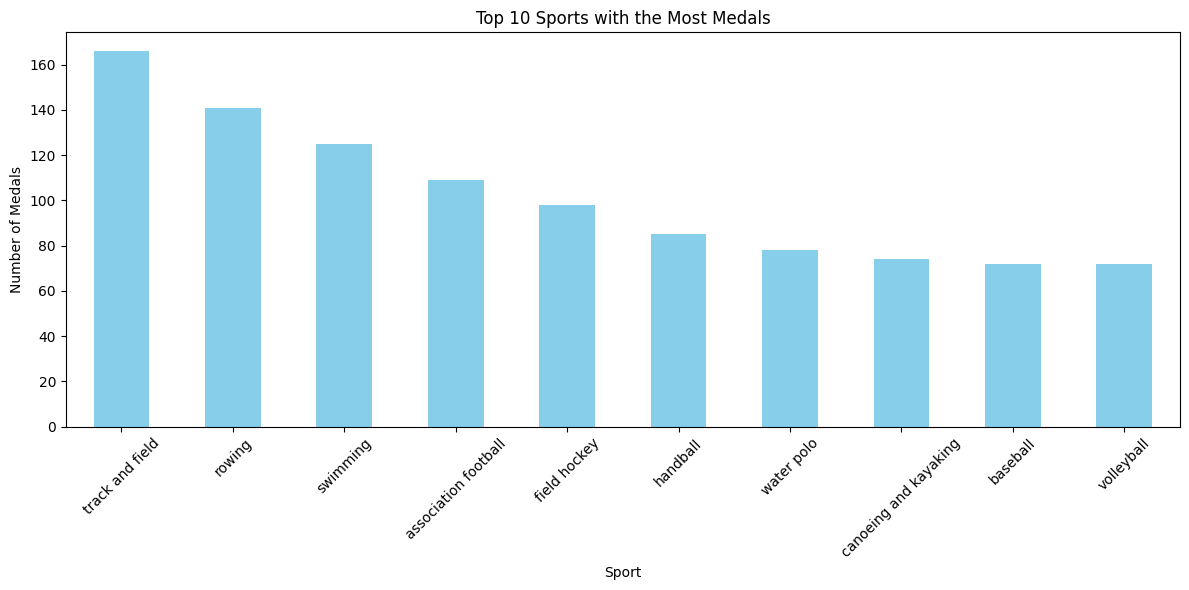

In [ ]:
import matplotlib.pyplot as plt

# I am creating a bar graph to visualize how many medals each sport got.


top_sports = df_cleaned["sport"].value_counts().head(10) # I am reducing the graph to the top 10 just so that it is easier to look at visually
plt.figure(figsize=(12, 6))
top_sports.plot(kind="bar", color="skyblue")
plt.title("Top 10 Sports with the Most Medals")
plt.xlabel("Sport")
plt.ylabel("Number of Medals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From this visualization I can see that "track and field" had the most medals by a decently sized margin (this make sense since the sport includes many individual events like sprints, hurdles, relays, jumps, throws, etc), "rowing" had the 2nd greatest number of medals, and swimming had the 3rd greatest number of medals (again this makes sense since swimming has multiple different strokes and distances). Interestingly, team sports like football, field hockey, handball, and volleyball have fewer medals (this is in part could be due to the fact that only a few medals are awarded per event compared to individual sports)

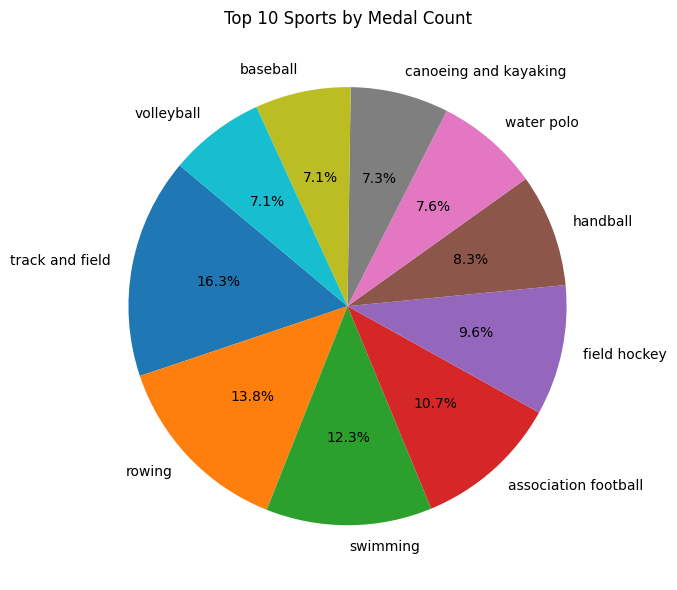

In [ ]:
# I am creating a pie chart as an alternative way to visualize how many medals each sport got.
plt.figure(figsize=(8, 6))
df_cleaned["sport"].value_counts().head(10).plot(
    kind="pie", autopct="%1.1f%%", startangle=140, ylabel="")
plt.title("Top 10 Sports by Medal Count")
plt.tight_layout()
plt.show()

This pie chart is essentially a different way of visualizing the bar graph above (medals per sport) but it is different because it includes percentages as a metric rather than just the raw number of medals for each sport (meaning this chart is a representation of how medal distribution varied by sport).  Track and field clearly dominates the chart, accounting for 16.3% of all medals, which is expected given its wide range of events including sprints, jumps, throws, and relays. Rowing follows closely with 13.8%, reflecting its numerous race categories and team events. Swimming also holds a substantial share at 12.3%, thanks to the variety of strokes and distances contested. Other sports such as association football, field hockey, and handball contribute moderate portions, generally representing team-based competitions where medals are limited to a few events per gender.

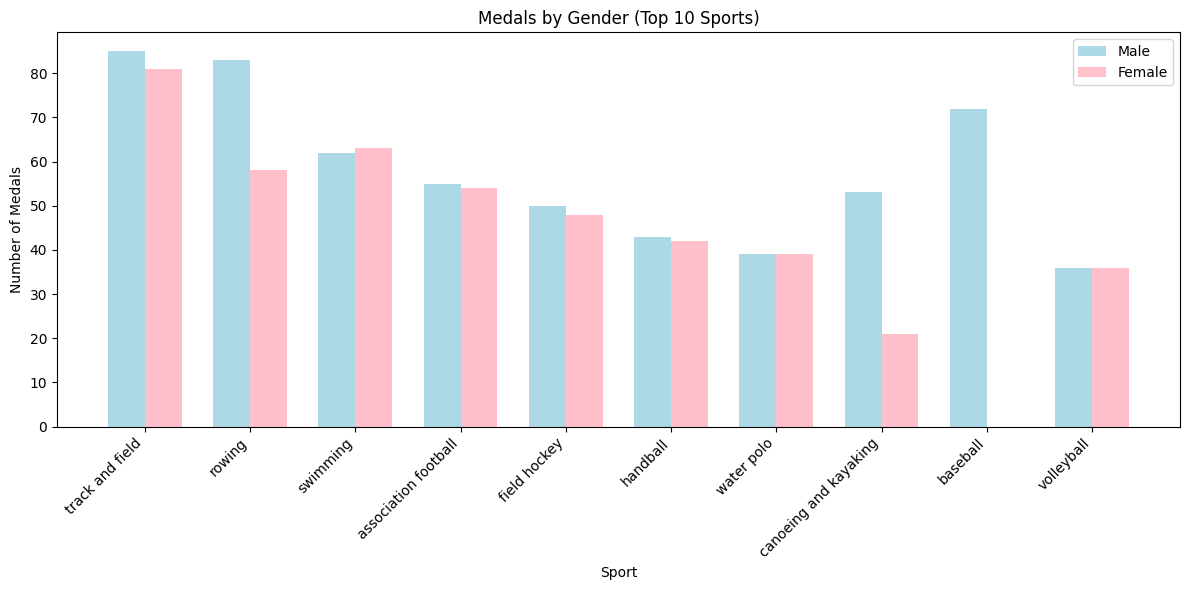

In [ ]:
import numpy as np

# I am creating a bar graph to visualize a comparison of how many medals each gender got per sport
# Group by sport & gender
sport_gender_counts = df_cleaned.groupby(["sport", "gender"]).size().unstack()

# Get top 10 sports
top_10 = sport_gender_counts.sum(axis=1).nlargest(10).index
sport_gender_counts = sport_gender_counts.loc[top_10]

# Plot
x = np.arange(len(top_10))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, sport_gender_counts["male"], width, label="Male", color="lightblue")
ax.bar(x + width/2, sport_gender_counts["female"], width, label="Female", color="pink")
ax.set_xticks(x)
ax.set_xticklabels(top_10, rotation=45, ha="right")
ax.set_title("Medals by Gender (Top 10 Sports)")
ax.set_xlabel("Sport")
ax.set_ylabel("Number of Medals")
ax.legend()
plt.tight_layout()
plt.show()

Looking at this bar chart I can see the distribution of medals by gender across the top 10 Olympic sports. Notably, Track and field stands out as the sport with the highest number of medals for both male and female athletes—in part reflecting the wide variety of events offered to both genders. Swimming is also well-balanced, with female athletes slightly edging out their male counterparts, suggesting strong participation and equity in event offerings. In contrast, rowing displays a significant gender gap, with male athletes earning substantially more medals—likely due to a greater number of male events or higher male participation during that Olympic cycle. Team sports such as association football, field hockey, handball, volleyball, and water polo show relatively equal medal counts between genders, which aligns with the structure of these events where typically only one medal set is awarded per gender. However, canoeing and kayaking reveal a sharp disparity, with male athletes winning more than double the medals compared to females. I noticed baseball appears exclusively male though this is likely because softball is its female counterpart and would have been represented separately (like it’s two separate variables). Overall, the chart highlights that while many Olympic sports in 2008 maintained a balanced gender representation, some sports still exhibited disparities in event opportunities and medal distribution.

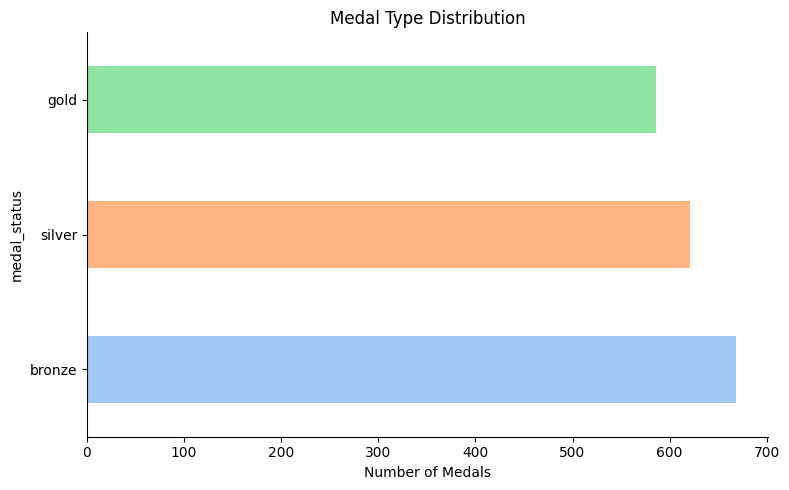

In [ ]:
import seaborn as sns

# I am creating a bar graph to visualize how many of each kind of medal (gold, silver, bronze) was won.
plt.figure(figsize=(8, 5))
df_cleaned["medal_status"].value_counts().plot(kind="barh", color=sns.color_palette("pastel"))
plt.title("Medal Type Distribution")
plt.xlabel("Number of Medals")
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

This horizontal bar chart shows the overall distribution of medal types awarded during the Olympics. Bronze medals were the most frequently awarded, followed by silver, with gold being the least common. This outcome aligns with the standard Olympic format, where each event awards one gold, one silver, and typically two bronze medals (for example in certain sports such as judo and wrestling, where both semifinal losers receive bronze). The slightly higher number of bronze medals reflects how medal distribution can vary depending on event structure. Overall, the chart offers a quick and effective visualization of the proportional breakdown of medals, emphasizing that gold medals.

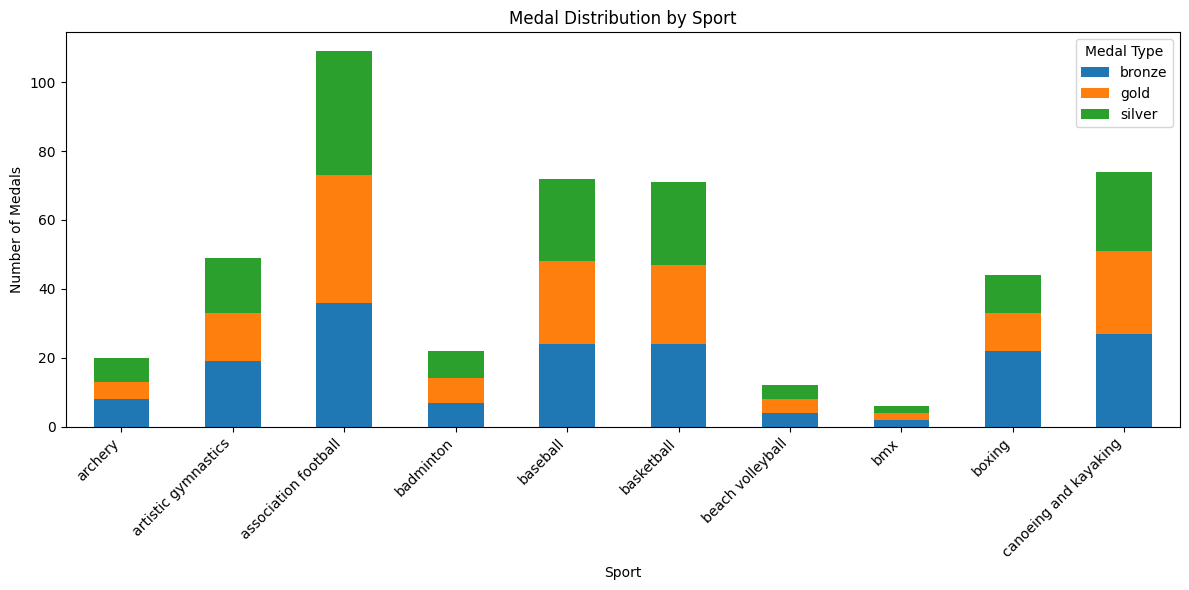

In [ ]:
# I am creating "Medal Distribution by Sport" stacked bar chart to show how many of each KIND of medal was won per sport
medal_counts = df_cleaned.groupby(["sport", "medal_status"]).size().unstack()
medal_counts.iloc[:10].plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Medal Distribution by Sport")
plt.xlabel("Sport")
plt.ylabel("Number of Medals")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Medal Type")
plt.tight_layout()
plt.show()

This stacked bar chart provides a detailed view of how different medal types—gold, silver, and bronze—were distributed across a selection of sports in the Olympics. Looking at the chart, Track and field once again stands out, with the highest overall medal count and a relatively balanced distribution among all three medal types. Association football follows with a significant number of medals, dominated by bronze and gold, which aligns with the team-based format where a fixed number of medals are awarded per tournament. Artistic gymnastics, baseball, and basketball also show fairly balanced medal distributions, though with smaller total counts. Sports like archery, badminton, and beach volleyball contributed fewer medals overall, but still maintain proportionate medal types. Interestingly, boxing shows a heavier emphasis on bronze medals, which makes sense given that two bronze medals are typically awarded per weight class in Olympic boxing.